# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import os
import sys

In [3]:
heartD_df = pd.read_csv('C://Users//12499//OneDrive//Documents//Durham College//AI Algorithm//Final Project//heart_disease Final//heart.csv')

In [4]:
heartD_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,`,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [5]:
heartD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
age         1212 non-null int64
sex         1212 non-null int64
cp          1212 non-null int64
trestbps    1212 non-null int64
chol        1212 non-null int64
fbs         1212 non-null int64
restecg     1212 non-null int64
thalach     1212 non-null int64
exang       1212 non-null int64
oldpeak     1212 non-null object
slope       1212 non-null int64
ca          1212 non-null int64
thal        1212 non-null int64
target      1212 non-null int64
dtypes: int64(13), object(1)
memory usage: 132.6+ KB


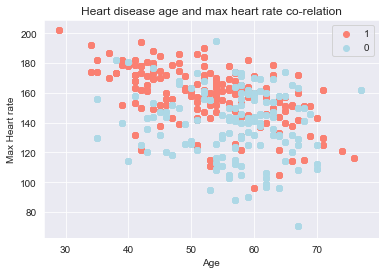

In [29]:
plt.scatter(heartD_df.age[heartD_df.target == 1], heartD_df.thalach[heartD_df.target ==1], c ="salmon");

plt.scatter(heartD_df.age[heartD_df.target == 0], heartD_df.thalach[heartD_df.target == 0], c= "lightblue");

plt.title( "Heart disease age and max heart rate co-relation")
plt.xlabel("Age")
plt.ylabel("Max Heart rate");
plt.legend([1,0]);

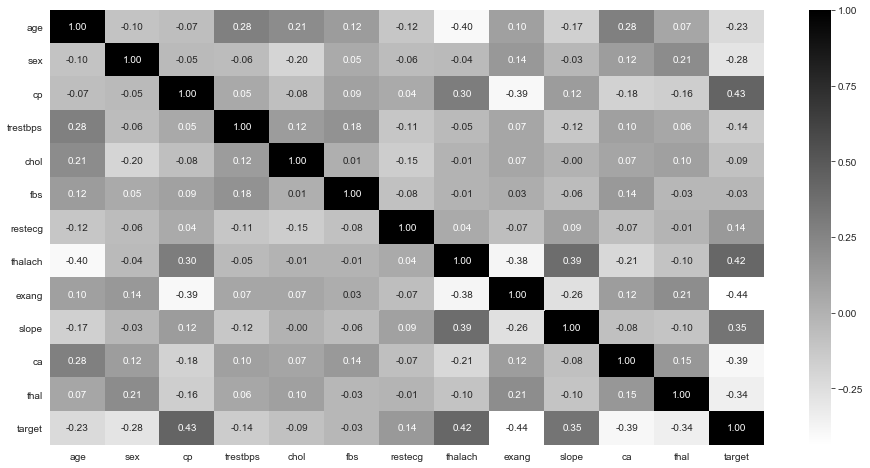

In [26]:
corr =heartD_df.corr()
fig, ax =plt.subplots(figsize =(16,8))
ax  = sns.heatmap(corr,annot =True,fmt = ".2f", cmap = 'gray_r');

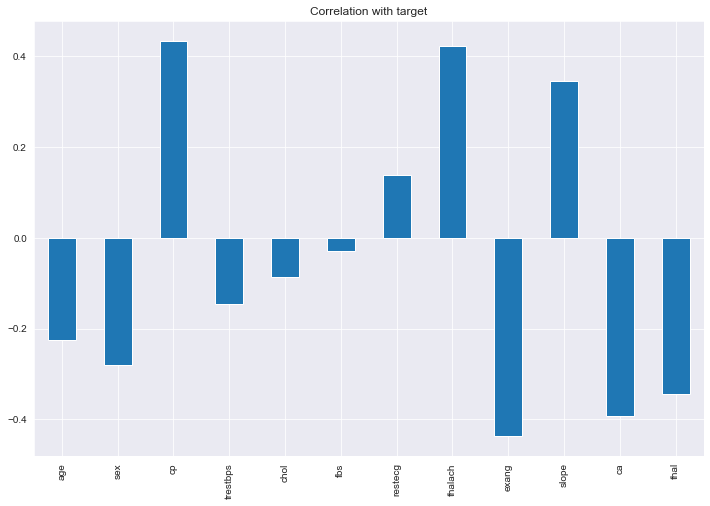

In [32]:
X = heartD_df.drop("target", axis =1)
Y = heartD_df["target"]
X.corrwith(heartD_df.target).plot(kind='bar',
                           grid=True, 
                           figsize=(12, 8),
                           title="Correlation with target");

In [6]:
df_target = heartD_df.groupby("target").size()
df_target

target
0    552
1    660
dtype: int64

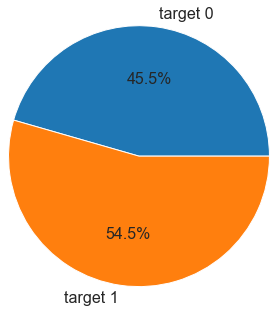

In [7]:
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [9]:
df_sex = heartD_df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          96
     1         288
1    0         456
     1         372
dtype: int64

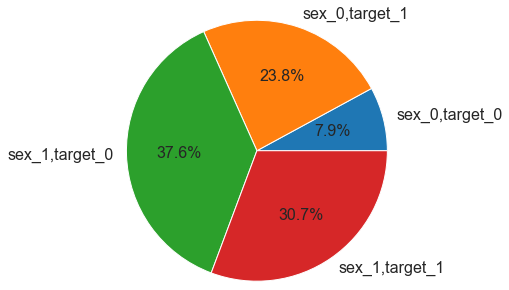

In [10]:
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

In [13]:
df_1 = heartD_df[["age", "trestbps", "chol", "thalach"]]
df_1.describe()

,age,trestbps,chol,thalach
count,1212.000000,1212.000000,1212.000000,1212.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.070845,17.516406,51.766511,22.876772
min,29.000000,94.000000,126.000000,71.000000
25%,47.000000,120.000000,211.000000,133.000000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,275.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


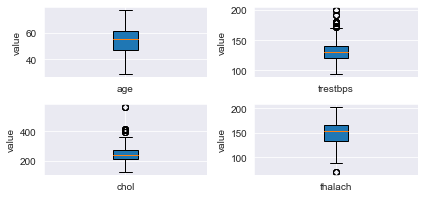

In [14]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

## There are outliers in each features except age. We define the outliers that are not in the range of 3 sigma. Then remove the outliers.

In [15]:
heartD_df.groupby(by=['cp', 'target'])['target'].count()

cp  target
0   0         416
    1         156
1   0          36
    1         164
2   0          72
    1         276
3   0          28
    1          64
Name: target, dtype: int64

In [16]:
pd.crosstab(heartD_df['cp'], heartD_df['target']).style.background_gradient(cmap='autumn_r')

target,0,1
cp,,
0,416,156
1,36,164
2,72,276
3,28,64


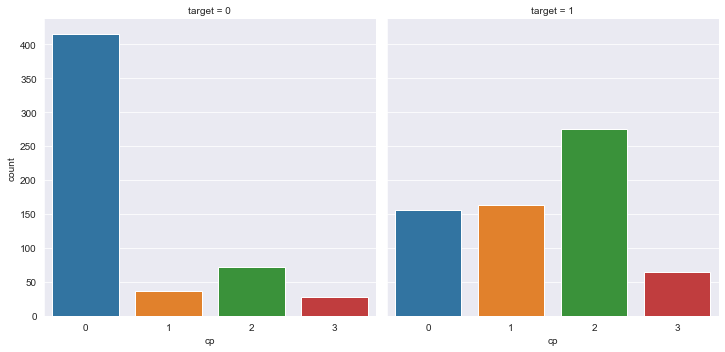

In [17]:
sns.catplot(x='cp', col='target', kind='count', data=heartD_df);

## Patients who had chest pain type 2 is more in the category of people with disease. Also, chest pain type 0 is not that serious as there are many people (~110) who had chest pain type 0 without heart disease.

In [18]:
heartD_df.groupby(by=['fbs', 'target'])['target'].count()

fbs  target
0    0         464
     1         568
1    0          88
     1          92
Name: target, dtype: int64

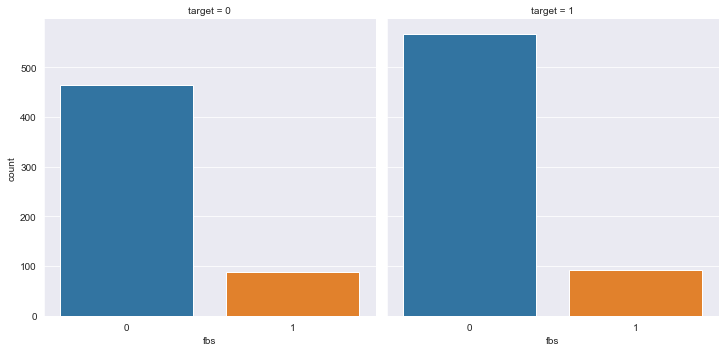

In [20]:
sns.catplot(x='fbs', col='target', kind='count', data=heartD_df);

## Number of people if blood sugar is almost similar in both categories. fbs won't be a good indicator always for determining heart disease from this dataset.

In [21]:
heartD_df.groupby(by=['restecg', 'target'])['target'].count()

restecg  target
0        0         316
         1         272
1        0         224
         1         384
2        0          12
         1           4
Name: target, dtype: int64

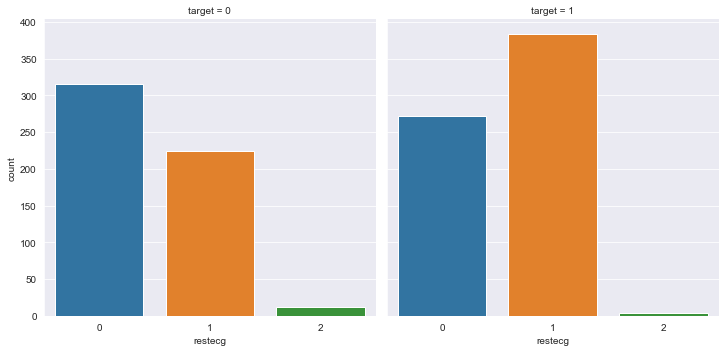

In [22]:
sns.catplot(x='restecg', col='target', kind='count', data=heartD_df);

## The number of people having ST-T wave abnormality is more in the category with heart disease.

In [23]:
heartD_df.groupby(by=['exang', 'target'])['target'].count()

exang  target
0      0         248
       1         568
1      0         304
       1          92
Name: target, dtype: int64

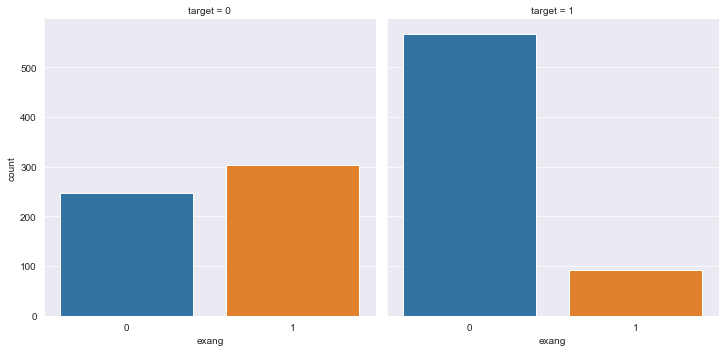

In [25]:
sns.catplot(x='exang', col='target', kind='count', data=heartD_df);

## without exercise induced angina is more in the category with disease.

# Split in train and test

In [46]:
df = pd.read_csv('C://Users//12499//OneDrive//Documents//Durham College//AI Algorithm//Final Project//heart_disease Final//heart.csv')

In [55]:
df = df.drop('oldpeak', axis=1)

In [56]:
X= df.drop('target',axis=1)
y=df['target']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## Decision Tree

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.818304    0.858342  0.840802    0.838323      0.839834
precision    0.866097    0.822938  0.840802    0.844517      0.842889
recall       0.775510    0.896930  0.840802    0.836220      0.840802
support    392.000000  456.000000  0.840802  848.000000    848.000000
_______________________________________________
Confusion Matrix: 
 [[304  88]
 [ 47 409]]

Test Result:
Accuracy Score: 85.44%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.828479    0.873508  0.854396    0.850994      0.853715
precision    0.859060    0.851163  0.854396    0.855112      0.854634
recall       0.800000    0.897059  0.854396    0.848529      0.854396
support    160.000000  204.000000  0.854396  364.000000    364.

## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.918367    0.929825  0.924528    0.924096      0.924528
precision    0.918367    0.929825  0.924528    0.924096      0.924528
recall       0.918367    0.929825  0.924528    0.924096      0.924528
support    392.000000  456.000000  0.924528  848.000000    848.000000
_______________________________________________
Confusion Matrix: 
 [[360  32]
 [ 32 424]]

Test Result:
Accuracy Score: 74.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.716049    0.772277  0.747253    0.744163      0.747562
precision    0.707317    0.780000  0.747253    0.743659      0.748051
recall       0.725000    0.764706  0.747253    0.744853      0.747253
support    160.000000  204.000000  0.747253  364.000000    364.

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
f1-score     1.0    1.0       1.0        1.0           1.0
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
support    392.0  456.0       1.0      848.0         848.0
_______________________________________________
Confusion Matrix: 
 [[392   0]
 [  0 456]]

Test Result:
Accuracy Score: 98.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.987654    0.990099  0.989011    0.988877      0.989024
precision    0.975610    1.000000  0.989011    0.987805      0.989279
recall       1.000000    0.980392  0.989011    0.990196      0.989011
support    160.000000  204.000000  0.989011  364.000000    364.000000
_______________________________________________

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
f1-score     1.0    1.0       1.0        1.0           1.0
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
support    392.0  456.0       1.0      848.0         848.0
_______________________________________________
Confusion Matrix: 
 [[392   0]
 [  0 456]]

Test Result:
Accuracy Score: 98.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
f1-score     0.987654    0.990099  0.989011    0.988877      0.989024
precision    0.975610    1.000000  0.989011    0.987805      0.989279
recall       1.000000    0.980392  0.989011    0.990196      0.989011
support    160.000000  204.000000  0.989011  364.000000    364.000000
_______________________________________________

## Out of all the algorithm, Decision tree and Random forest are the most efficient and accurate one